# Student Performence in Exams - Writing Score

In [514]:
# Import Libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [515]:
data = pd.read_csv('StudentsPerformance.csv')

In [516]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [517]:
# Some statistics about the data

In [518]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [520]:
# We can see that there are no missing values

In [521]:
# Now let's convert the data to numeric so the machine learning algorithms could be trained and make predictions.

In [522]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

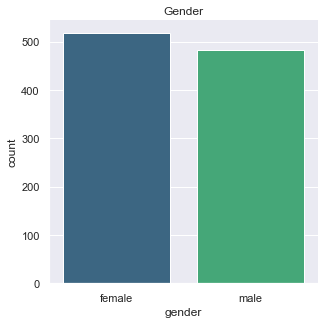

In [523]:
sns.catplot(x='gender',kind='count',data=data,height=4.5,palette='viridis')
plt.title('Gender')

In [524]:
data['gender'].replace({'male':'0','female':'1'},inplace=True)

In [525]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

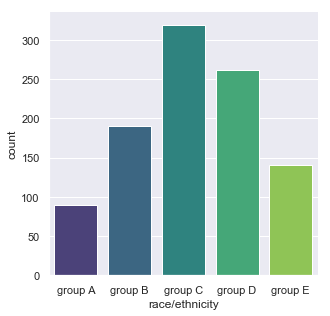

In [526]:
data["race/ethnicity"].sort_values()
sns.catplot(x='race/ethnicity',kind='count',data=data,height=4.5,palette='viridis',
            order=['group A','group B','group C','group D','group E'])

In [527]:
data['race/ethnicity'].replace({'group A':'1','group B':'2', 'group C':'3',
                               'group D':'4','group E':'5'},inplace=True)

In [528]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

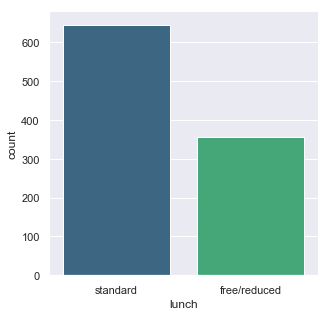

In [529]:
sns.catplot(x='lunch',kind='count',data=data,height=4.5,palette='viridis')

In [530]:
data['lunch'].replace({'free/reduced':'0','standard':'1'},inplace=True)

In [531]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

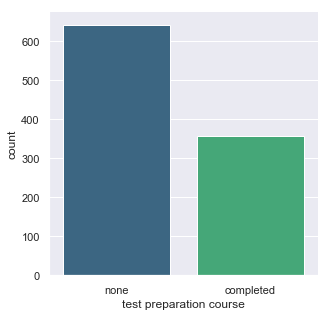

In [532]:
sns.catplot(x='test preparation course',kind='count',data=data,height=4.5,palette='viridis')

In [533]:
data['test preparation course'].replace({'none':'0','completed':'1'},inplace=True)

In [534]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

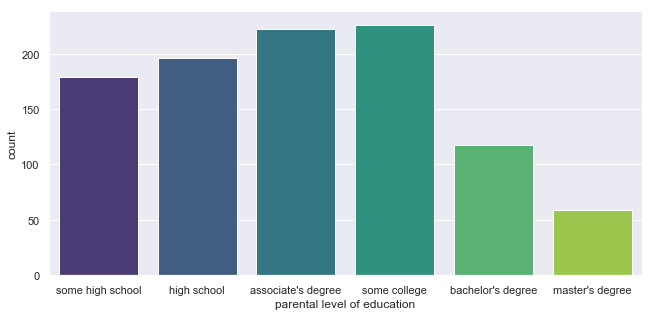

In [535]:
data["race/ethnicity"].sort_values()
sns.catplot(x='parental level of education',kind='count',data=data,height=4.5,aspect=2,palette='viridis',
            order=["some high school","high school","associate's degree","some college",
                   "bachelor's degree","master's degree"],)

In [536]:
data['parental level of education'].replace({'some high school':'1','high school':'1',"associate's degree":'2',
                                        'some college':'3',"bachelor's degree":'4',"master's degree":'5'},inplace=True)

In [537]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,4,1,0,72,72,74
1,1,3,3,1,1,69,90,88
2,1,2,5,1,0,90,95,93
3,0,1,2,0,0,47,57,44
4,0,3,3,1,0,76,78,75


Now, when all our fields are numeric, we can continue with the project and make some exploratory data analysis

***

## Exploratory Data Analysis

In [538]:
# Now we will look a little deeper on some interesting plots of our data, in order to get some insights

Text(0.5, 1.0, 'Writing Score by Test Preparation Course')

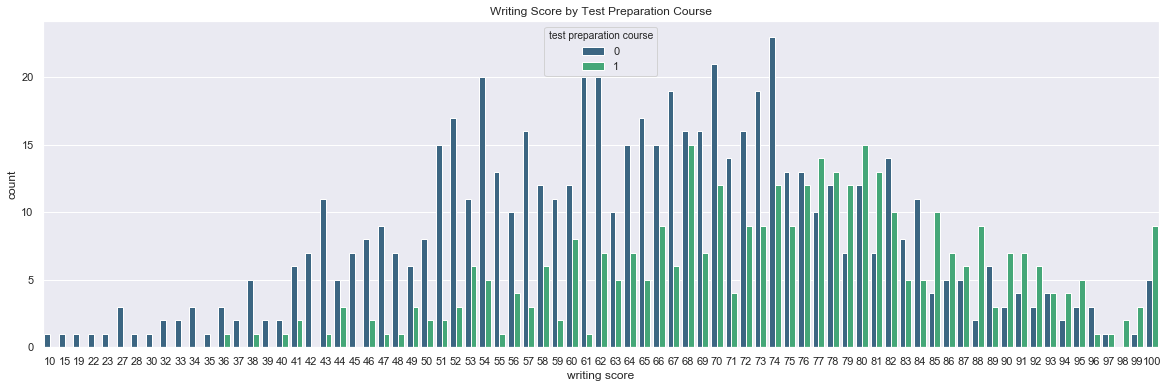

In [539]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x='writing score', hue='test preparation course',data=data, palette='viridis')
plt.title('Writing Score by Test Preparation Course')

We can see from this plot that most of the students who got a high score at the writing test, __study__ at the test preparation course. We can understand that the preparation course is __helping__ the students at the writing test

***

Text(0.5, 1.0, 'Math score VS Readind Score by Gender')

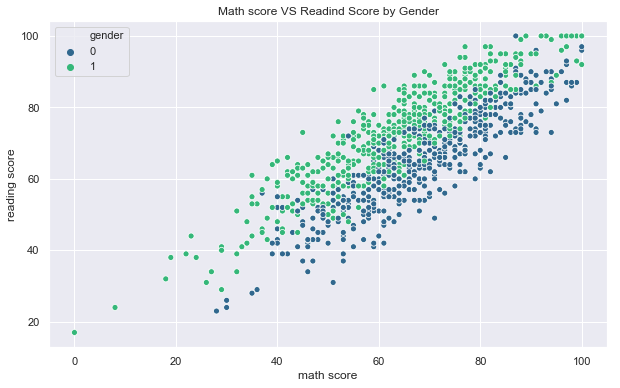

In [540]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score',y='reading score', hue='gender',data=data, palette='viridis')
plt.title('Math score VS Readind Score by Gender')

We can see that there is a __nice correlation__ between the math score and the reading score. We can also see that __female__ (Green) has a better score at the reading exams

***

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

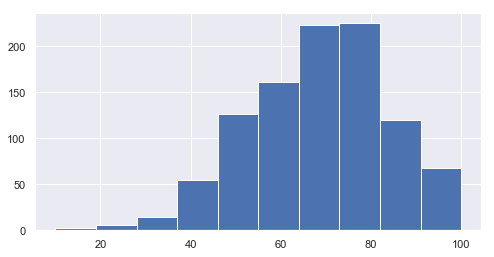

In [541]:
# Take a look at our objectives distribution
plt.figure(figsize=(8, 4))
plt.hist(x='writing score',bins=10,data=data)

We can see that the scores distribution is a __Normal distrution__, where most of the student's score is between __65 to 80__

***

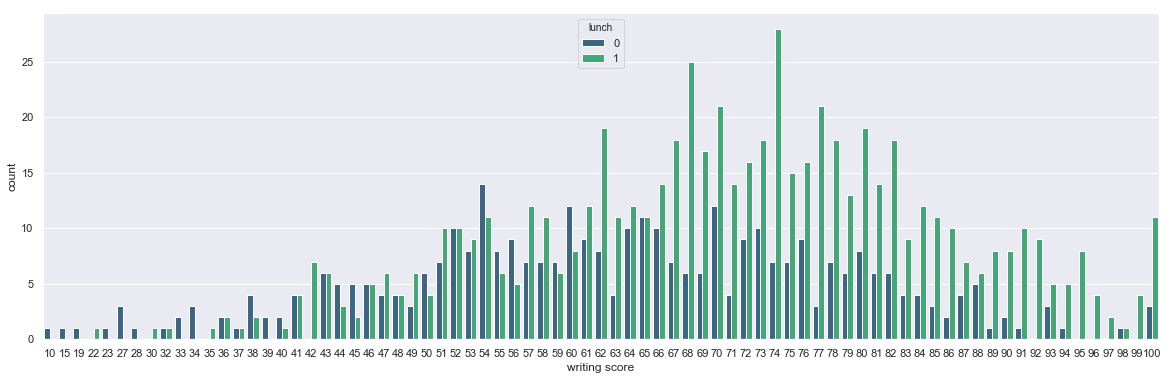

In [542]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x='writing score', hue='lunch',data=data, palette='viridis')

We can see that the students who __ate lunch__, had a __better__ score at the writing test.

***

# Machine Learning

## Linear Regression##

We will first split the data to our predictors variables and our criterion variable

In [543]:
X = data[['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score']]

In [544]:
y = data['writing score']

In [545]:
# Split the data to train and test
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [546]:
# implementation of Linear Regression model using scikit-learn and K-fold for stable model
from sklearn.linear_model import LinearRegression
kfold = model_selection.KFold(n_splits=10)
lr = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring=scoring)
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [5.92314043 0.03452786 0.79869168 0.27363764 3.44534519 0.28882554
 0.65390452]


In [547]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

MAE: 2.9585960546146453
MSE: 13.32155500588487
RMSE: 3.6498705464557055


In [548]:
from sklearn.metrics import r2_score
print("R_square score: ", r2_score(y_test,lr_predictions))

R_square score:  0.9458158621171207


***

***

## Decision Trees

In [549]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)
dtr_predictions = dtr.predict(X_test) 

# R^2 Score
print("R_square score: ", r2_score(y_test,dtr_predictions))

R_square score:  0.88030987648245


***

## Random Forest

In [550]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
rfr_predicitions = rfr.predict(X_test) 

# R^2 Score
print("R_square score: ", r2_score(y_test,rfr_predicitions))

R_square score:  0.9332924670487978


***

## Gardient Boosting

In [551]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(X_train, y_train)
clf_predicitions = clf.predict(X_test) 
print("R_square score: ", r2_score(y_test,clf_predicitions))

R_square score:  0.9349417535989092


***

Now we will show a comparison between all the models that we got

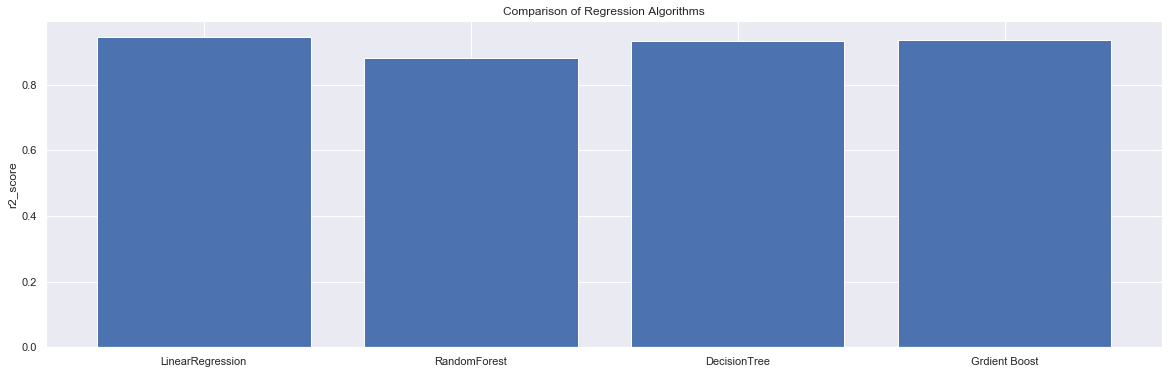

In [552]:
y = np.array([r2_score(y_test,lr_predictions),r2_score(y_test,dtr_predictions),r2_score(y_test,rfr_predicitions),
           r2_score(y_test,clf_predicitions)])
x = ["LinearRegression","RandomForest","DecisionTree","Grdient Boost"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()

The Linear Regression has the highest R^2 Score - __0.945__